# 📒 **JAX Pruebas**

En este cuaderno se realizarán pruebas prácticas con **JAX**, una librería desarrollada por Google para computación numérica y aprendizaje automático de alto rendimiento. El objetivo es explorar sus principales características, como la diferenciación automática, la compilación just-in-time (JIT), la vectorización y la ejecución acelerada en CPU/GPU/TPU.

A lo largo del cuaderno se implementarán ejemplos que permitan:

* Comprender el funcionamiento básico de JAX.
* Comparar su estilo de programación con frameworks como TensorFlow y PyTorch.
* Evaluar su rendimiento y facilidad de uso en tareas de aprendizaje automático.

<img src="https://github.com/Alejandro-BR/jax-research/blob/main/img/jax.png?raw=true" width="150"/>

**Autor: [Alejandro Barrionuevo Rosado](https://github.com/Alejandro-BR)**

Máster de FP en Inteligencia Artifical y Big Data - CPIFP Alan Turing *texto en cursiva*

<img src="https://github.com/Alejandro-BR/jax-research/blob/main/img/alan_turing.png?raw=true" width="150"/>

[![Jax Research](https://img.shields.io/badge/jax--research-GitHub-181717?style=flat&logo=github&logoColor=white)](https://github.com/Alejandro-BR/jax-research)
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Alejandro-BR/jax-research/blob/main/notebooks/jax_tests.ipynb)
![Python](https://img.shields.io/badge/python-3.12-blue?style=flat&logo=python&logoColor=white)



## **Definición**

JAX es una biblioteca de Python desarrollada por Google para aprendizaje automático y computación numérica de alto rendimiento. Su API se basa en **NumPy**, lo que permite trabajar con funciones numéricas de manera familiar y sencilla. Gracias a esto, JAX resulta **flexible, fácil de aprender y eficiente** para realizar cálculos avanzados en CPU, GPU o TPU.


## **Versión de Python**


In [1]:
!python --version

Python 3.12.12


## **Instalación de dependencias**

En esta sección se instalarán todas las dependencias que utilizaremos en este cuaderno.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [3]:
# Funcion para dividir los datos en entrenamiento y prueba.
from sklearn.model_selection import train_test_split

# Clase para normalizar los datos (media 0, desviacion estandar 1).
from sklearn.preprocessing import StandardScaler

# Funcion para calcular la precision.
from sklearn.metrics import accuracy_score

# Funcion para la matrix de confusion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### **Instalación JAX**

<img src="https://github.com/Alejandro-BR/jax-research/blob/main/img/jax.png?raw=true" width="150"/>

CPU-only (Linux/macOS/Windows)
```python
!pip install -U jax
```
GPU (NVIDIA, CUDA 13)
```python
!pip install -U "jax[cuda13]"
```
TPU (Google Cloud TPU VM)
```python
!pip install -U "jax[tpu]"
```

[Instalación JAX](https://docs.jax.dev/en/latest/installation.html)

In [4]:
# CPU-only (Linux/macOS/Windows)
# !pip install -U jax
# GPU (NVIDIA, CUDA 12)
!pip install -U "jax[cuda12]"
# TPU (Google Cloud TPU VM)
# !pip install -U "jax[tpu]"

import jax
import jax.numpy as jnp

print("JAX version:", jax.__version__)
print("Backend (CPU/GPU/TPU):", jax.devices())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.9/154.9 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 71.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 MB 19.7 MB/s eta 0:00:00
  Attempting uninstall: jax-cuda12-pjrt
    Found existing installation: jax-cuda12-pjrt 0.7.2
    Uninstalling jax-cuda12-pjrt-0.7.2:
      Successfully uninstalled jax-cuda12-pjrt-0.7.2
  Attempting uninstall: nvidia-cuda-nvcc-cu12
    Found existing installation: nvidia-cuda-nvcc-cu12 12.5.82
    Uninstalling nvidia-cuda-nvcc-cu12-12.5.82:
      Successfully uninstalled nvidia-cuda-nvcc-cu12-12.5.82
  Attempting uninstall: jax-cuda12-plugin
    Found existing installation: jax-cuda12-plugin 0.7.2
    Uninstalling jax-cuda12-plugin-0.7.2:
      Successfully uninstalled jax-cuda12-plugin-0.7.2
  Atte

In [49]:
from jax import random, grad

### **Instalación de TensorFlow**

<img src="https://github.com/Alejandro-BR/jax-research/blob/main/img/tensorflow_logo.svg.png?raw=true" width="150"/>




In [5]:
import tensorflow as tf
from tensorflow import keras

print("Versión de TensorFlow:", tf.__version__)
print("GPU disponible:", "Sí" if tf.config.list_physical_devices('GPU') else "No")
print("Versión de Keras:", keras.__version__)

Versión de TensorFlow: 2.19.0
GPU disponible: Sí
Versión de Keras: 3.10.0


In [6]:
from tensorflow.keras import layers, models

### **Instalación de PyTorch**

<img src="https://github.com/Alejandro-BR/jax-research/blob/main/img/pytorch.webp?raw=true" width="150"/>


In [44]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F

print("Versión de PyTorch:", torch.__version__)
print("GPU disponible:", "Sí" if torch.cuda.is_available() else "No")

Versión de PyTorch: 2.9.0+cu126
GPU disponible: Sí


## **Ecosistema**

Librerías implementadas sobre JAX y otras herramientas que se integran bien con esta tecnología.

### Ejemplos de librerías que usan JAX

1. **Flax** – Librería para construir redes neuronales de manera modular y flexible.
2. **Haiku** – Otra librería de alto nivel para redes neuronales en JAX.
3. **Optax** – Optimizadores y funciones de actualización para entrenamiento de modelos.
4. **Chex** – Utilidades para pruebas, depuración y validación de modelos.
5. **Distrax** – Distribuciones de probabilidad y herramientas para modelado probabilístico.
6. **JAX MD** – Dinámica molecular y simulaciones físicas.
7. **Objax** – Framework ligero para deep learning en JAX.
8. **Evox** – Evolución y algoritmos genéticos con JAX.
9. **BraX** – Simulaciones físicas aceleradas por hardware, integración con JAX.
10. **Jraph** – Librería para grafos y redes neuronales sobre grafos (GNNs) con JAX.


## **jax.numpy**

![jnp](https://github.com/Alejandro-BR/jax-research/blob/main/img/np_vs_jnp.webp?raw=true)

[jax.numpy](https://docs.jax.dev/en/latest/jax.numpy.html) es como NumPy, pero acelerado y diferenciable, y jnp es solo el nombre corto que usamos para llamar a esas funciones.

A diferencia de Numpy, que solo se ejecuta en CPU, JAX admite operaciones de matriz en múltiples aceleradores, incluyendo CPU, GPU y TPU. Esta capacidad permite a JAX gestionar eficientemente cálculos a gran escala y tareas de aprendizaje profundo, aprovechando el procesamiento paralelo para aumentar significativamente el rendimiento.

> Esta sección está basada en: [jax-vs-numpy-key-differences-and-benefits](https://medium.com/@harshavardhangv/jax-vs-numpy-key-differences-and-benefits-72e442bbf67f)


```python
import jax.numpy as jnp
```

### **Consideraciones importantes al usar JAX**

#### 1. Inmutabilidad
   - Los arrays de JAX son **inmutables**. No se pueden modificar directamente como en NumPy.
   - Para actualizar valores específicos se usan `.at[index].set(valor)`:

In [8]:
array = jnp.array([ 1 , 2 , 3 , 4 ])

# La asignación directa como en NumPy generará un error
# array[1] = 3 # Descomentar esta línea generará un error

# Usa .at para especificar el índice y .set para actualizar el valor
array = array.at[ 1 ]. set ( 3 )

# Imprime la matriz actualizada
print(array)   # Salida: [1, 3, 3, 4]

[1 3 3 4]


#### 2. Funciones puras

   * JAX requiere que las funciones sean **puras**: siempre devuelven la misma salida para la misma entrada y no modifican estados externos.
   * JAX no puede compilar funciones que alteren variables globales
  

In [9]:
# Define una variable global
global_var = 0

# Define una función no pura que modifica la variable global
def  impure_function ( x ):
    global global_var
    global_var = x
    return x

# Compilación JIT de JAX
jitted_function = jax.jit(impure_function)
print (jitted_function( 5.0 ))

# Imprime la variable global
print ( "Variable global:" , global_var)

5.0
Variable global: JitTracer(~float32[])


El resultado anterior se debe a que jax.jitla compilación espera una función pura pero encontró una función no pura y esto arrojó un resultado inesperado.

#### 3. Indexación fuera de límites

   * NumPy lanza `IndexError` si un índice está fuera de rango. JAX ajusta el índice al límite válido:

In [10]:
# Numpy
# Inicializar la matriz
array = np.array([ 1 , 2 , 3 , 4 ])

# imprimir el índice fuera de los límites
# print(array[ 6 ]) # genera un IndexError

# JAX
# Inicializar la matriz
array = jnp.array([ 1 , 2 , 3 , 4 ])

# imprimir el índice fuera de los límites
print(array[ 6 ], array[- 3 ]) # imprime (4, 1)

4 2


#### 4. Entradas deben ser arrays

* JAX no acepta directamente listas o tuplas en operaciones numéricas.
* Hay que **transformarlas a un array de JAX (`jnp.array`)** antes de usarlas.


In [11]:
lista = [1, 2, 3]
array = jnp.array(lista)
print(jnp.sum(array))  # 6

6


#### 5. Tipos de datos

Los tipos de datos son prácticamente iguales a NumPy.

### **Ejemplo práctico**

En este bloque realizaremos **pruebas prácticas con `jax.numpy`**, la implementación de NumPy dentro de JAX.



#### Crear arrays

In [12]:
array1 = jnp.array([1, 2, 3, 4])
array2 = jnp.array([[1, 2], [3, 4]])

print("Array 1:", array1)
print("Array 2:\n", array2)

Array 1: [1 2 3 4]
Array 2:
 [[1 2]
 [3 4]]


#### Operaciones

In [13]:
print("Array:", array1)
print("Suma de array1:", jnp.sum(array1))
print("Media de array1:", jnp.mean(array1))
print("Mediana de array1:", jnp.median(array1))

# Moda (no existe directa, se calcula así)
values, counts = jnp.unique(array1, return_counts=True)
mode = values[jnp.argmax(counts)]
print("Moda de array1:", mode)

print("Producto de array1:", jnp.prod(array1))
print("Máximo de array1:", jnp.max(array1))
print("Mínimo de array1:", jnp.min(array1))
print("Desviación estándar de array1:", jnp.std(array1))
print("Varianza de array1:", jnp.var(array1))
print("Suma acumulada de array1:", jnp.cumsum(array1))
print("Producto acumulado de array1:", jnp.cumprod(array1))
print("Producto punto de array1 consigo mismo:", jnp.dot(array1, array1))
print("Array ordenado:", jnp.sort(array1))
print("Raíz cuadrada de array1:", jnp.sqrt(array1))
print("Array al cuadrado:", jnp.power(array1, 2))
print("Valor absoluto de array1:", jnp.abs(array1))
print("Array redondeado:", jnp.round(array1))

Array: [1 2 3 4]
Suma de array1: 10
Media de array1: 2.5
Mediana de array1: 2.5
Moda de array1: 1
Producto de array1: 24
Máximo de array1: 4
Mínimo de array1: 1
Desviación estándar de array1: 1.1180339
Varianza de array1: 1.25
Suma acumulada de array1: [ 1  3  6 10]
Producto acumulado de array1: [ 1  2  6 24]
Producto punto de array1 consigo mismo: 30
Array ordenado: [1 2 3 4]
Raíz cuadrada de array1: [1.        1.4142135 1.7320508 2.       ]
Array al cuadrado: [ 1  4  9 16]
Valor absoluto de array1: [1 2 3 4]
Array redondeado: [1 2 3 4]


#### Indexación y slicing

In [14]:
print("Primer elemento de array1:", array1[0])
print("Últimos dos elementos de array1:", array1[-2:])
print("Fila 0 de array2:", array2[0])

Primer elemento de array1: 1
Últimos dos elementos de array1: [3 4]
Fila 0 de array2: [1 2]


#### Inmutabilidad - Actualizar valores usando `.at[].set()`

In [15]:
# array1[1] = 10  # Esto daría error

In [16]:
array1_updated = array1.at[1].set(10)
print("\nArray1 actualizado:", array1_updated)


Array1 actualizado: [ 1 10  3  4]


## **Clasificación de imágenes con CIFAR-10 en tres frameworks**

El **dataset [`CIFAR-10`](https://www.cs.toronto.edu/~kriz/cifar.html)** es un conjunto de datos ampliamente utilizado en visión por computador que contiene **60 000 imágenes a color de 32×32 píxeles**, distribuidas en **10 clases**: avión, automóvil, pájaro, gato, ciervo, perro, rana, caballo, barco y camión. Cada clase cuenta con 6 000 imágenes, lo que lo convierte en un benchmark estándar para evaluar modelos de clasificación de imágenes.

El objetivo de este ejercicio es **comparar la implementación de una red neuronal convolucional (CNN)** para clasificación multiclase utilizando tres frameworks de deep learning:

1. **PyTorch**
2. **JAX**
3. **Keras / TensorFlow**

En este ejercicio se abordarán los siguientes puntos:

* Carga y normalización de imágenes.
* Definición de la misma **arquitectura de red convolucional** en los tres frameworks.
* Entrenamiento y evaluación del modelo en cada framework.
* Comparación de sintaxis, facilidad de uso, rendimiento en GPU y flexibilidad de cada herramienta.

De esta manera, se podrá observar cómo **la misma tarea de clasificación de imágenes** puede implementarse en distintos ecosistemas de deep learning, destacando las diferencias en estilo de programación, abstracción y rendimiento computacional.

![cifa10](https://github.com/Alejandro-BR/jax-research/blob/main/img/cifar10_ia.png?raw=true)


### **Carga de datos**

Trabajaremos con **CIFAR-10**, un conjunto de imágenes en color (RGB) de tamaño 32x32 perteneciente a 10 categorías.

`avión | coche | pájaro | gato | ciervo | perro | rana | caballo | barco |  camión`



In [17]:
cifar10 = keras.datasets.cifar10
cifar10

<module 'keras.datasets.cifar10' from '/usr/local/lib/python3.12/dist-packages/keras/datasets/cifar10/__init__.py'>

### **Partición de los datos**


In [18]:
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [19]:
y_train_full, y_test

(array([[6],
        [9],
        [9],
        ...,
        [9],
        [1],
        [1]], dtype=uint8),
 array([[3],
        [8],
        [8],
        ...,
        [5],
        [1],
        [7]], dtype=uint8))

In [20]:
# CIFAR-10 devuelve las etiquetas con forma (n, 1); las convertimos a (n, ).
y_train_full = y_train_full.squeeze()
y_test = y_test.squeeze()

In [21]:
y_train_full, y_test

(array([6, 9, 9, ..., 9, 1, 1], dtype=uint8),
 array([3, 8, 8, ..., 5, 1, 7], dtype=uint8))

### **Exploración de los datos**

* Contamos con **60 000 imágenes**: 50 000 para entrenamiento y 10 000 para prueba.
* Cada imagen tiene tamaño **32×32 píxeles** y **3 canales de color (RGB)**.
* Los valores de los píxeles están en formato **uint8** (enteros de 0 a 255).



In [22]:
X_train_full

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [23]:
X_train_full.shape

(50000, 32, 32, 3)

In [24]:
X_test.shape

(10000, 32, 32, 3)

In [25]:
X_train_full.dtype

dtype('uint8')

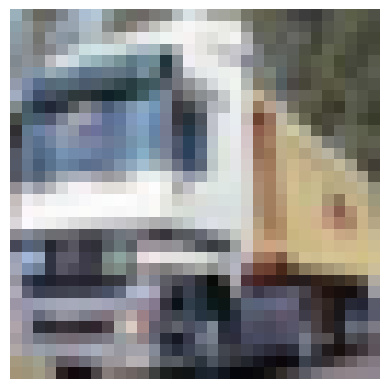

In [26]:
# Imagen 1 de los datos de entrenamiento
example_cifar = X_train_full[1]
plt.imshow(example_cifar)
plt.axis("off")
plt.show()

#### **Categorías existentes**

En **CIFAR-10**, las etiquetas (`y_train` o `y_test`) son enteros del **0 al 9**, y cada número corresponde a una clase de objeto. La correspondencia oficial es la siguiente:

| Etiqueta | Clase     |
| -------- | --------- |
| 0        | avión     |
| 1        | automóvil |
| 2        | pájaro    |
| 3        | gato      |
| 4        | ciervo    |
| 5        | perro     |
| 6        | rana      |
| 7        | caballo   |
| 8        | barco     |
| 9        | camión    |


In [27]:
np.unique(y_train_full)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [28]:
class_names = ["avión", "automóvil", "pájaro", "gato", "ciervo",
               "perro", "rana", "caballo", "barco", "camión"]

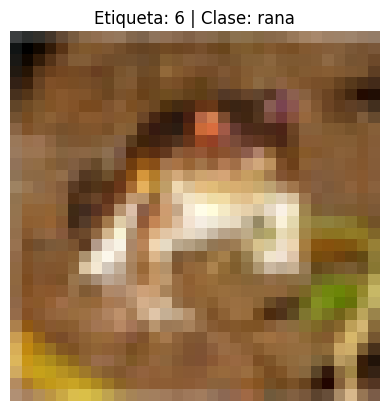

In [29]:
# Imagen 0 de los datos de entrenamiento
example_cifar = X_train_full[0]
plt.imshow(example_cifar)
plt.title(f"Etiqueta: {y_train_full[0]} | Clase: {class_names[y_train_full[0]]}")
plt.axis("off")
plt.show()

### **Preparación de los datos**

Contamos con **datos de entrenamiento** y **datos de prueba**.
Además, vamos a crear un **conjunto de validación** adicional.

* Los **datos de validación** se usarán para medir la precisión del modelo durante el entrenamiento.
* Los **datos de prueba** se utilizarán para evaluar la efectividad final del modelo una vez entrenado.

Por último, vamos a **escalar los valores de los píxeles** al intervalo $[0,1]$ dividiendo entre 255. Esto ayuda a que el entrenamiento sea más estable y rápido.


In [30]:
X_valid, X_train = X_train_full[:5000] / 255.0 , X_train_full[5000:] / 255.0
X_test = X_test / 255.0

In [31]:
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

### **Creación de los modelos**

Vamos a construir una **red neuronal convolucional básica (CNN)** con **tres capas convolucionales** seguidas de **capas densas**.

  * Capas convolucionales con activación **ReLU** y **MaxPooling** para reducir dimensiones.
  * Una capa **Flatten** para convertir la salida de convoluciones en un vector.
  * Una capa densa intermedia con activación ReLU.
  * Capa de salida con **10 neuronas** y activación **softmax** para clasificación multiclase.

Esta configuración es lo suficientemente sencilla para experimentar rápidamente en los tres frameworks, pero también permite comparar **facilidad de programación, velocidad y uso de GPU**.


#### **Tensorflow / Keras**

In [32]:
model_keras = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model_keras.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [34]:
model_keras.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
history_keras = model_keras.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_valid, y_valid)
)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7554 - loss: 0.6974 - val_accuracy: 0.6946 - val_loss: 0.8831
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7664 - loss: 0.6580 - val_accuracy: 0.6948 - val_loss: 0.8962
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7794 - loss: 0.6321 - val_accuracy: 0.6964 - val_loss: 0.8927
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7860 - loss: 0.6088 - val_accuracy: 0.6970 - val_loss: 0.8998
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7944 - loss: 0.5836 - val_accuracy: 0.7100 - val_loss: 0.8779
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8052 - loss: 0.5500 - val_accuracy: 0.7006 - val_loss: 0.8755
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8124 - loss: 0.5291 - val_accuracy: 0.7118 - val_loss: 0.8872
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8201 - loss: 0.5042 - val_accuracy: 0.

In [38]:
test_loss_keras, test_acc_keras = model_keras.evaluate(X_test, y_test)
print("Precisión en test:", test_acc_keras)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7031 - loss: 0.9920
Precisión en test: 0.6973999738693237


In [48]:
model_keras.save("model_keras.keras")

#### **PyTorch**

In [40]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3)
        self.fc1 = nn.Linear(64 * 4 * 4, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = x.view(x.size(0), -1)  # Flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)  # CrossEntropyLoss incluye softmax
        return x

# Crear el modelo
model_pytorch = CNN()

In [41]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_pytorch.parameters(), lr=0.001)

In [42]:
train_dataset = TensorDataset(
    torch.tensor(X_train, dtype=torch.float32).permute(0,3,1,2),
    torch.tensor(y_train, dtype=torch.long)
)

valid_dataset = TensorDataset(
    torch.tensor(X_valid, dtype=torch.float32).permute(0,3,1,2),
    torch.tensor(y_valid, dtype=torch.long)
)

test_dataset = TensorDataset(
    torch.tensor(X_test, dtype=torch.float32).permute(0,3,1,2),
    torch.tensor(y_test, dtype=torch.long)
)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=64)
test_loader = DataLoader(test_dataset, batch_size=64)

In [45]:
epochs = 10
history = {"train_loss": [], "val_loss": [], "val_acc": []}

for epoch in range(epochs):
    model_pytorch.train()
    train_loss = 0.0

    for x_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model_pytorch(x_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss /= len(train_loader)

    # Validación
    model_pytorch.eval()
    val_loss = 0.0
    correct, total = 0, 0
    with torch.no_grad():
        for x_batch, y_batch in valid_loader:
            outputs = model_pytorch(x_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()
            preds = outputs.argmax(dim=1)
            correct += (preds == y_batch).sum().item()
            total += y_batch.size(0)

    val_loss /= len(valid_loader)
    val_acc = correct / total

    history["train_loss"].append(train_loss)
    history["val_loss"].append(val_loss)
    history["val_acc"].append(val_acc)

    print(f"Epoch {epoch+1}/{epochs} - "
          f"loss: {train_loss:.4f} - "
          f"val_loss: {val_loss:.4f} - "
          f"val_acc: {val_acc:.4f}")


Epoch 1/10 - loss: 1.6931 - val_loss: 1.4401 - val_acc: 0.4750
Epoch 2/10 - loss: 1.3828 - val_loss: 1.3033 - val_acc: 0.5328
Epoch 3/10 - loss: 1.2430 - val_loss: 1.2301 - val_acc: 0.5686
Epoch 4/10 - loss: 1.1332 - val_loss: 1.0803 - val_acc: 0.6230
Epoch 5/10 - loss: 1.0516 - val_loss: 1.0079 - val_acc: 0.6450
Epoch 6/10 - loss: 0.9854 - val_loss: 0.9817 - val_acc: 0.6506
Epoch 7/10 - loss: 0.9310 - val_loss: 0.9617 - val_acc: 0.6612
Epoch 8/10 - loss: 0.8889 - val_loss: 0.9846 - val_acc: 0.6572
Epoch 9/10 - loss: 0.8477 - val_loss: 0.9527 - val_acc: 0.6674
Epoch 10/10 - loss: 0.8092 - val_loss: 1.0189 - val_acc: 0.6526


In [46]:
model_pytorch.eval()
test_loss = 0.0
correct, total = 0, 0

with torch.no_grad():
    for x_batch, y_batch in test_loader:
        outputs = model_pytorch(x_batch)
        loss = criterion(outputs, y_batch)
        test_loss += loss.item()
        preds = outputs.argmax(dim=1)
        correct += (preds == y_batch).sum().item()
        total += y_batch.size(0)

test_loss /= len(test_loader)
test_acc = correct / total

print("Precisión en test:", test_acc)

Precisión en test: 0.6542


In [47]:
torch.save(model_pytorch.state_dict(), "model_pytorch.pth")

#### **JAX**

In [59]:
def init_cnn_params(key):
  k1, k2, k3, k4, k5 = random.split(key, 5)
  flatten_size = 8*8*64
  params = {
    "conv1": random.normal(k1, (3,3,3,32)) * 0.1,
    "conv2": random.normal(k2, (3,3,32,64)) * 0.1,
    "conv3": random.normal(k3, (3,3,64,64)) * 0.1,
    "dense1": random.normal(k4, (flatten_size, 64)) * 0.1,
    "dense2": random.normal(k5, (64, 10)) * 0.1
  }
  biases = {k: jnp.zeros(v.shape[-1]) for k,v in params.items()}
  return params, biases

In [60]:
def relu(x): return jnp.maximum(0, x)

def softmax(x): return jnp.exp(x) / jnp.sum(jnp.exp(x), axis=-1, keepdims=True)

def max_pool(x, size=2, stride=2):
  n, h, w, c = x.shape
  x = x.reshape(n, h//size, size, w//size, size, c)
  return jnp.max(x, axis=(2,4))

def conv2d(x, w, b):
  x = jax.lax.conv_general_dilated(
      x, w, window_strides=(1,1),
      padding="SAME", dimension_numbers=("NHWC","HWIO","NHWC"))
  return x + b

In [61]:
def forward(params, biases, x):
  x = relu(conv2d(x, params["conv1"], biases["conv1"]))
  x = max_pool(x)
  x = relu(conv2d(x, params["conv2"], biases["conv2"]))
  x = max_pool(x)
  x = relu(conv2d(x, params["conv3"], biases["conv3"]))
  x = x.reshape(x.shape[0], -1)  # flatten
  x = relu(x @ params["dense1"] + biases["dense1"])
  x = x @ params["dense2"] + biases["dense2"]
  return softmax(x)

In [62]:
def loss_fn(params, biases, x, y):
  logits = forward(params, biases, x)
  return -jnp.mean(jnp.log(logits[jnp.arange(len(y)), y] + 1e-7))

def accuracy(params, biases, x, y):
  pred = jnp.argmax(forward(params, biases, x), axis=-1)
  return jnp.mean(pred == y)

In [63]:
def update(params, biases, x, y, lr=1e-3):
  grads_params = grad(loss_fn, argnums=0)(params, biases, x, y)
  grads_biases = grad(loss_fn, argnums=1)(params, biases, x, y)
  params = {k: params[k] - lr*grads_params[k] for k in params}
  biases = {k: biases[k] - lr*grads_biases[k] for k in biases}
  return params, biases

In [64]:
key = random.PRNGKey(0)
params, biases = init_cnn_params(key)

In [65]:
num_epochs = 10
batch_size = 64
num_train = len(X_train)

for epoch in range(num_epochs):
  perm = np.random.permutation(num_train)
  X_train = X_train[perm]
  y_train = y_train[perm]
  for i in range(0, num_train, batch_size):
    xb = X_train[i:i+batch_size]
    yb = y_train[i:i+batch_size]
    params, biases = update(params, biases, xb, yb)
  val_acc = accuracy(params, biases, X_valid, y_valid)
  print(f"Epoch {epoch+1}, Validation Accuracy: {val_acc:.4f}")


Epoch 1, Validation Accuracy: 0.2364
Epoch 2, Validation Accuracy: 0.2848
Epoch 3, Validation Accuracy: 0.3098
Epoch 4, Validation Accuracy: 0.3206
Epoch 5, Validation Accuracy: 0.3618
Epoch 6, Validation Accuracy: 0.3806
Epoch 7, Validation Accuracy: 0.3908
Epoch 8, Validation Accuracy: 0.3804
Epoch 9, Validation Accuracy: 0.4306
Epoch 10, Validation Accuracy: 0.4202


In [66]:
with open("model_jax.pkl", "wb") as f:
  pickle.dump({'params': params, 'biases': biases}, f)

print("Modelo guardado en model_jax.pkl")

Modelo guardado en model_jax.pkl


## **Bibliografia**

- [JAX](https://docs.jax.dev/en/latest/)
- [ChatGPT](https://chatgpt.com/)
- [eiposgrados](https://eiposgrados.com/blog-python/jax-machine-learning/#:~:text=JAX%20es%20una%20nueva%20biblioteca,flexible%20y%20f%C3%A1cil%20de%20aprender.)
- [medium](https://medium.com/@harshavardhangv/jax-vs-numpy-key-differences-and-benefits-72e442bbf67f)
- [cifar10](https://www.cs.toronto.edu/~kriz/cifar.html)
- [TensorFlow](https://www.tensorflow.org/)
- [PyTorch](https://docs.pytorch.org/)
